In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits)

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

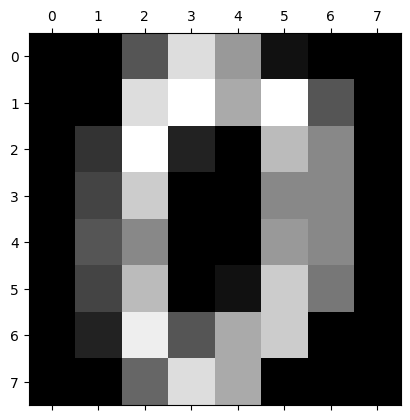

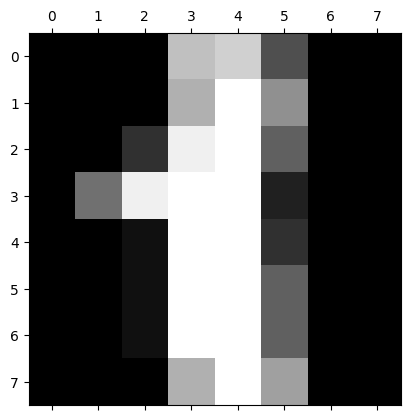

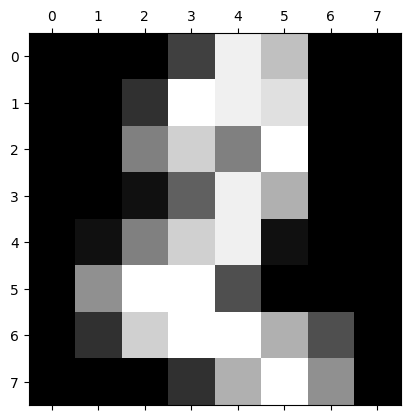

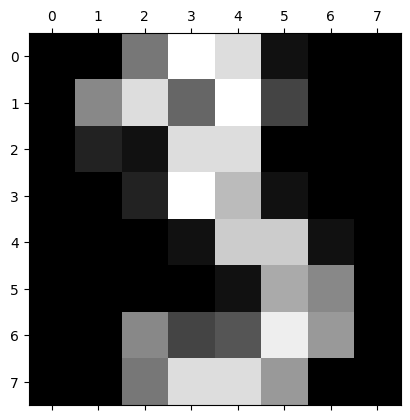

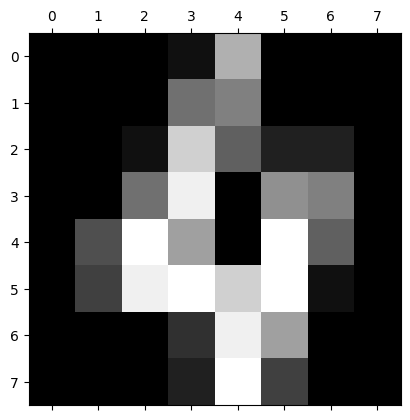

In [8]:
# We can see that it is an array, which is basically an iamge
# data will have the values, but images will have the actual image
# lets try to see the image
plt.gray()
#plt.matshow(digits.images[0])
# lets see the first 5 images
for i in range(5):
  plt.matshow(digits.images[i])


In [9]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [10]:
# Hence we can use data and target to train our model
# Splitting the dataset into a and b datasets
a = digits.data
b = digits.target
a.shape, b.shape

((1797, 64), (1797,))

In [11]:
# Splitting the datasets into training and testing datasets
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=88)
print("Training sets size: ", a_train.shape, b_train.shape)
print("Testing sets size: ", a_test.shape, b_test.shape)

Training sets size:  (1437, 64) (1437,)
Testing sets size:  (360, 64) (360,)


In [12]:
# Build log reg model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)

In [ ]:
# Train the model on training data
lr.fit(a_train, b_train)

In [14]:
# Finding predicted values using the testing dataset
b_pred = lr.predict(a_test)
b_pred.shape, b_test.shape

((360,), (360,))

In [18]:
# Performance evaluation
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score , roc_auc_score, confusion_matrix
print("Model accuracy score: ", accuracy_score(b_pred, b_test))
print("Model precision score: ", precision_score(b_pred, b_test, average='weighted'))
print("Model f1 score: ", f1_score(b_pred, b_test,  average='weighted'))
print("Model recall score: ", recall_score(b_pred, b_test,  average='weighted'))
# print("Model roc-auc score:  ", roc_auc_score(b_pred, b_test))   # Not used for multiclass classification
print("Model confusion matrix: ", confusion_matrix(b_pred, b_test))

Model accuracy score:  0.9611111111111111
Model precision score:  0.9621839514425299
Model f1 score:  0.9612396757239459
Model recall score:  0.9611111111111111
Model confusion matrix:  [[29  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  1  0  1  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  1  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  0  1 42  0  0  0]
 [ 0  0  0  0  0  1  0 28  0  0]
 [ 0  0  0  0  0  1  1  0 34  1]
 [ 0  0  0  0  0  2  0  0  1 30]]


Text(33.22222222222222, 0.5, 'Actual')

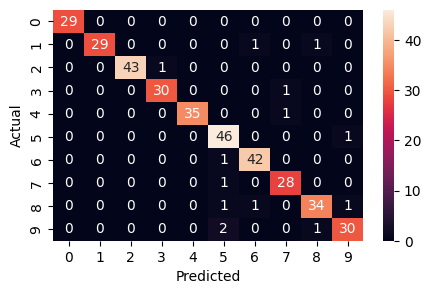

In [30]:
# To find where the model made mistakes
import seaborn as sn
plt.figure(figsize=(5,3))
sn.heatmap(confusion_matrix(b_pred, b_test), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")


In [19]:
lr.score(a_test, b_test)

0.9611111111111111

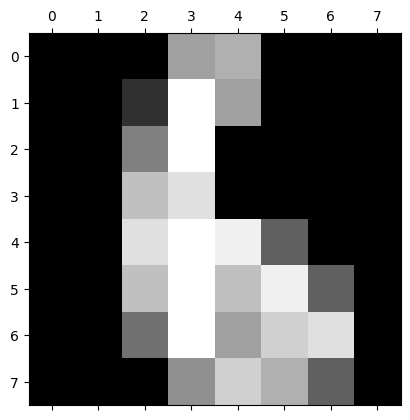

In [20]:
plt.matshow(digits.images[88])

In [21]:
digits.target[88]

6

In [23]:
lr.predict([digits.data[88]])   # outout must be 2d array, so supply 2d input only

array([6])

In [25]:
# Lets predict 0:5
lr.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [26]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [ ]:
# Predicted values are equal to the actual values